Importing Libraries

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as ply
import seaborn as sns

Reading csv file

In [40]:
df = pd.read_csv('../data/customer_segmentation.csv')

Displaying first few rows of dataset

In [41]:
df.head()

,customer_id,age,gender,city,account_age_days,total_orders,total_items_sold,total_items_bought,avg_order_value,total_spend,total_earnings,preferred_category,payment_method,return_rate_percent,last_purchase_days_ago,seller_rating_avg,buyer_rating_avg,is_active_user,avg_delivery_days,discount_usage_percent
0,CUST200000,22.0,Other,Chennai,1607,36,199,235,6554.68,119220.48,317832.03,Furniture,Wallet,3.64,21,2.94,3.14,1,3.0,47.78
1,CUST200001,43.0,Other,Hyderabad,259,34,53,182,16574.06,553373.86,137265.06,Sports,COD,33.54,73,3.25,2.22,1,4.0,14.02
2,CUST200002,NaN,Other,Hyderabad,1111,141,248,61,14378.53,NaN,206200.00,NaN,Wallet,37.40,257,2.81,3.61,1,1.0,55.54
3,CUST200003,37.0,Other,Kolkata,1869,110,194,349,19386.89,85615.65,86447.90,Automobile,Debit Card,13.53,52,3.82,2.30,1,7.0,17.35
4,CUST200004,41.0,Other,NaN,2607,136,243,98,14853.60,700671.16,378772.75,Sports,NaN,43.98,243,4.49,2.73,1,6.0,43.15


In [42]:
df.shape

(15000, 20)

Calculation of statistical measures

In [43]:
df.describe()

,age,account_age_days,total_orders,total_items_sold,total_items_bought,avg_order_value,total_spend,total_earnings,return_rate_percent,last_purchase_days_ago,seller_rating_avg,buyer_rating_avg,is_active_user,avg_delivery_days,discount_usage_percent
count,13976.000000,15000.000000,15000.000000,15000.000000,15000.000000,14214.000000,14228.000000,15000.000000,15000.000000,15000.000000,14053.000000,15000.000000,15000.000000,14186.000000,15000.000000
mean,40.925372,1514.201800,74.561600,148.554000,200.425533,10031.406757,403688.011176,252093.563225,22.348751,182.142333,3.511859,3.501789,0.696600,6.014169,29.990527
std,13.619031,858.768095,43.197311,86.875772,115.059618,5745.739679,229868.502375,144842.838618,12.974638,104.110286,0.867325,0.867084,0.459742,3.176204,17.378026
min,18.000000,30.000000,1.000000,0.000000,1.000000,200.000000,1053.640000,36.360000,0.000000,1.000000,2.000000,2.000000,0.000000,1.000000,0.000000
25%,29.000000,770.000000,37.000000,74.000000,100.000000,5017.702500,205418.425000,127333.277500,11.080000,93.000000,2.760000,2.740000,0.000000,3.000000,14.817500
50%,41.000000,1513.000000,74.000000,148.000000,201.000000,9957.255000,403995.015000,251965.680000,22.370000,182.000000,3.520000,3.510000,1.000000,6.000000,30.130000
75%,53.000000,2252.000000,112.000000,224.000000,300.000000,15045.760000,602394.202500,378421.742500,33.520000,271.000000,4.260000,4.260000,1.000000,9.000000,44.962500
max,64.000000,2999.000000,149.000000,299.000000,399.000000,19998.540000,799914.440000,499967.920000,44.990000,364.000000,5.000000,5.000000,1.000000,11.000000,60.000000


Checing for missing values

In [44]:
df.isna().sum()

customer_id                  0
age                       1024
gender                     774
city                       789
account_age_days             0
total_orders                 0
total_items_sold             0
total_items_bought           0
avg_order_value            786
total_spend                772
total_earnings               0
preferred_category        1045
payment_method             959
return_rate_percent          0
last_purchase_days_ago       0
seller_rating_avg          947
buyer_rating_avg             0
is_active_user               0
avg_delivery_days          814
discount_usage_percent       0
dtype: int64

In [45]:
df1 = df.dropna()

In [46]:
df1.isna().sum()

customer_id               0
age                       0
gender                    0
city                      0
account_age_days          0
total_orders              0
total_items_sold          0
total_items_bought        0
avg_order_value           0
total_spend               0
total_earnings            0
preferred_category        0
payment_method            0
return_rate_percent       0
last_purchase_days_ago    0
seller_rating_avg         0
buyer_rating_avg          0
is_active_user            0
avg_delivery_days         0
discount_usage_percent    0
dtype: int64

In [47]:
df1.nunique()

customer_id               8720
age                         47
gender                       3
city                         8
account_age_days          2803
total_orders               149
total_items_sold           300
total_items_bought         399
avg_order_value           8698
total_spend               8719
total_earnings            8718
preferred_category           7
payment_method               5
return_rate_percent       3833
last_purchase_days_ago     364
seller_rating_avg          301
buyer_rating_avg           301
is_active_user               2
avg_delivery_days           11
discount_usage_percent    4582
dtype: int64

In [48]:
df1['preferred_category'].nunique()

7

Visualization of preferred category of products

In [49]:
df1['preferred_category'].value_counts()

preferred_category
Fashion        1294
Home Decor     1285
Electronics    1284
Books          1258
Furniture      1234
Automobile     1190
Sports         1175
Name: count, dtype: int64

<Axes: xlabel='preferred_category'>

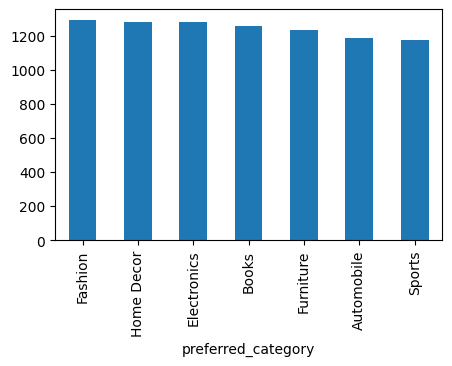

In [50]:
from matplotlib import pyplot as plt


plt.figure(figsize=(5,3))
df1['preferred_category'].value_counts().plot(kind='bar')

Analysing Gender

<Axes: title={'center': 'Gender Ratio'}>

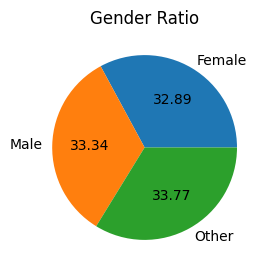

In [51]:

df1.groupby('gender').size().plot(kind='pie', autopct='%.2f', title='Gender Ratio', figsize=(3, 3))

<Axes: xlabel='gender'>

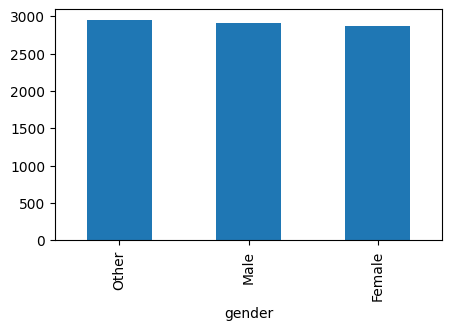

In [52]:
from matplotlib import pyplot as plt


plt.figure(figsize=(5,3))
df1['gender'].value_counts().plot(kind='bar')

In [53]:
df.groupby('gender').size()

gender
Female    4697
Male      4738
Other     4791
dtype: int64

In [54]:
import pandas as pd
import numpy as np

# Define bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70]
labels = ['1-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70']

# Create age_group column
df1['age_group'] = pd.cut(
    df1['age'],
    bins=bins,
    labels=labels,
    right=True,
    include_lowest=True
)


C:\Users\HPP\AppData\Local\Temp\ipykernel_36308\2036890444.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age_group'] = pd.cut(


In [55]:
df1.groupby('age_group').size()

C:\Users\HPP\AppData\Local\Temp\ipykernel_36308\1414241857.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('age_group').size()


age_group
1-10        0
11-20     540
21-30    1890
31-40    1865
41-50    1812
51-60    1836
61-70     777
dtype: int64

C:\Users\HPP\AppData\Local\Temp\ipykernel_36308\3125162176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df1.groupby('age_group').size().plot(kind = 'bar', figsize = (5,3), title = 'Purchase Distribution by Age')


<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='age_group'>

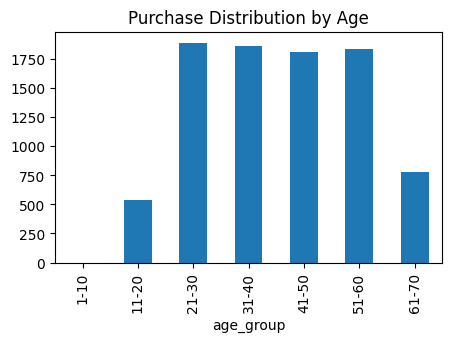

In [56]:
df1.groupby('age_group').size().plot(kind = 'bar', figsize = (5,3), title = 'Purchase Distribution by Age')



TOtal spending vs Total earning

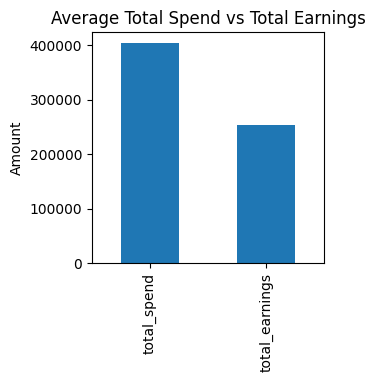

In [59]:
from matplotlib import pyplot as plt

plt.figure(figsize=(3, 3))
df1[['total_spend', 'total_earnings']].mean().plot(kind='bar')
plt.ylabel('Amount')
plt.title('Average Total Spend vs Total Earnings')
plt.show()


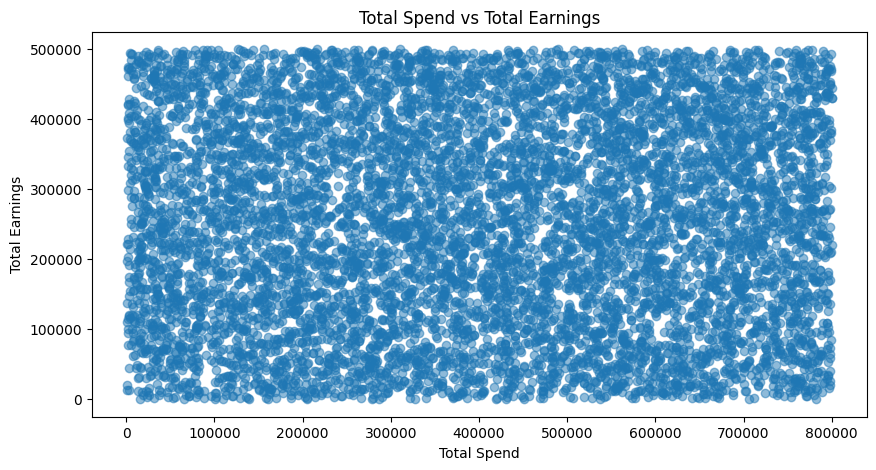

In [63]:
plt.figure(figsize=(10,5))
plt.scatter(df1['total_spend'], df1['total_earnings'], alpha=0.5)
plt.xlabel('Total Spend')
plt.ylabel('Total Earnings')
plt.title('Total Spend vs Total Earnings')
plt.show()


Total Spenf Distribution

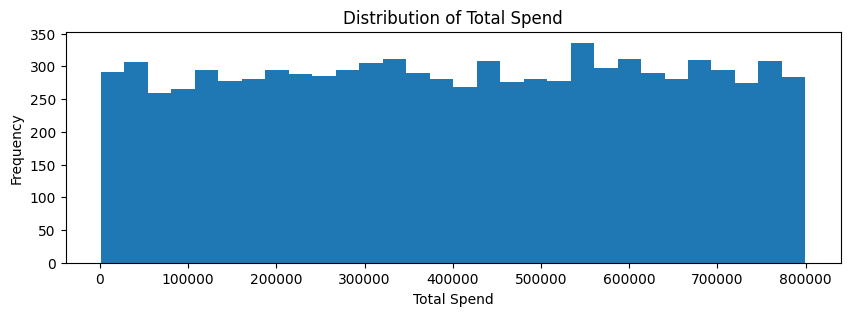

In [61]:
plt.figure(figsize=(10,3))
plt.hist(df1['total_spend'], bins=30)
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.title('Distribution of Total Spend')
plt.show()


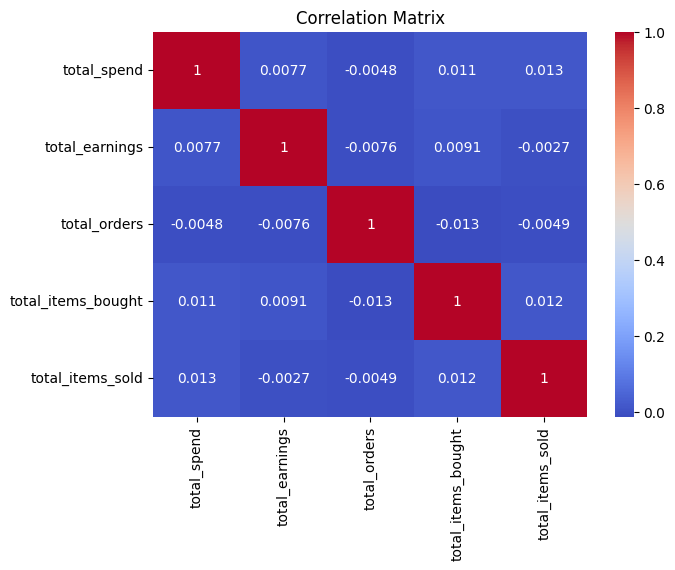

In [64]:
plt.figure(figsize=(7,5))
sns.heatmap(
    df1[['total_spend','total_earnings','total_orders',
         'total_items_bought','total_items_sold']].corr(),
    annot=True,
    cmap='coolwarm'
)
plt.title('Correlation Matrix')
plt.show()


Customer Segmentation


In [70]:
def customer_segment(row):
    if row['total_spend'] >= 300000 and row['total_orders'] >= 40:
        return 'High Value Customer'
    elif row['total_orders'] >= 25:
        return 'Frequent Buyer'
    elif row['last_purchase_days_ago'] >= 180:
        return 'Churn Risk'
    else:
        return 'Regular Customer'

df1['customer_segment'] = df1.apply(customer_segment, axis=1)


C:\Users\HPP\AppData\Local\Temp\ipykernel_36308\1656288865.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['customer_segment'] = df1.apply(customer_segment, axis=1)


Segment Analysis

In [71]:
df1.groupby('customer_segment')[[
    'total_spend',
    'total_orders',
    'total_earnings'
]].mean()


,total_spend,total_orders,total_earnings
customer_segment,,,
Churn Risk,404898.332232,12.697350,260681.194059
Frequent Buyer,223739.672995,77.767428,252461.471041
High Value Customer,551131.844898,94.450000,253857.035114
Regular Customer,397031.556519,12.276504,252455.455186


Segment Visualization

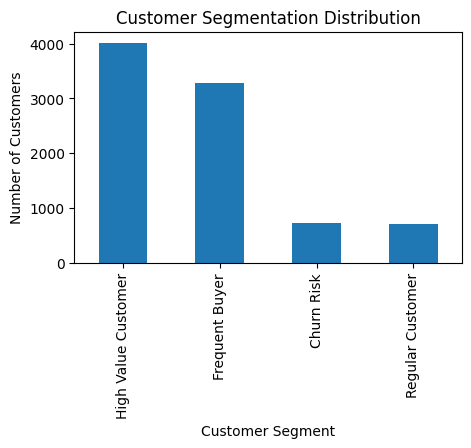

In [72]:

from matplotlib import pyplot as plt

plt.figure(figsize=(5,3))
df1['customer_segment'].value_counts().plot(kind='bar')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Distribution')
plt.show()


Average spend per segment

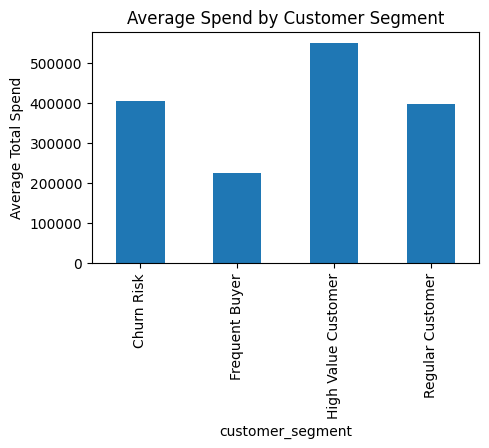

In [73]:
plt.figure(figsize=(5,3))
df1.groupby('customer_segment')['total_spend'].mean().plot(kind='bar')
plt.ylabel('Average Total Spend')
plt.title('Average Spend by Customer Segment')
plt.show()


Validate the segments

In [75]:
df1['customer_segment'].value_counts()


customer_segment
High Value Customer    4020
Frequent Buyer         3285
Churn Risk              717
Regular Customer        698
Name: count, dtype: int64

Compare key metrices across segments

In [74]:
segment_summary = df1.groupby('customer_segment')[[
    'total_spend',
    'total_orders',
    'total_earnings',
    'last_purchase_days_ago'
]].mean()

segment_summary


,total_spend,total_orders,total_earnings,last_purchase_days_ago
customer_segment,,,,
Churn Risk,404898.332232,12.697350,260681.194059,269.348675
Frequent Buyer,223739.672995,77.767428,252461.471041,181.666667
High Value Customer,551131.844898,94.450000,253857.035114,180.458209
Regular Customer,397031.556519,12.276504,252455.455186,93.680516


Visualization of customer count per segment

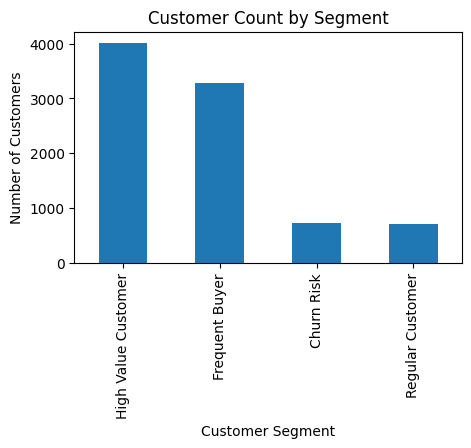

In [76]:
from matplotlib import pyplot as plt

plt.figure(figsize=(5,3))
df1['customer_segment'].value_counts().plot(kind='bar')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Count by Segment')
plt.show()


Average spend per segment

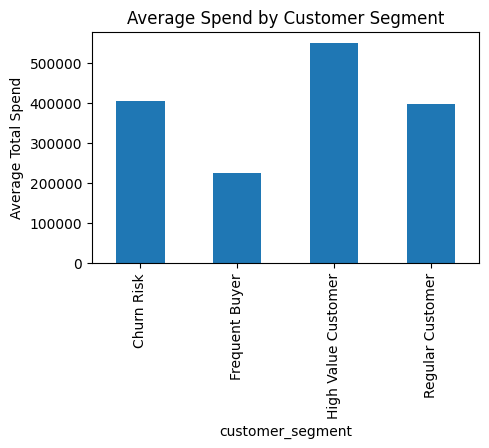

In [77]:
plt.figure(figsize=(5,3))
df1.groupby('customer_segment')['total_spend'].mean().plot(kind='bar')
plt.ylabel('Average Total Spend')
plt.title('Average Spend by Customer Segment')
plt.show()


Purchase vs selling behaviour by segments

In [79]:
df1.groupby('customer_segment')[[
    'total_items_bought',
    'total_items_sold'
]].mean()


,total_items_bought,total_items_sold
customer_segment,,
Churn Risk,199.446304,152.709902
Frequent Buyer,202.496499,146.808219
High Value Customer,197.982338,148.421393
Regular Customer,193.962751,148.691977
